# **MÓDULO 15 - Exercício**
## Análise  - A segunda etapa da Pré Modelagem
### **Objetivos**
##### 1)Save and read da base de dados
Salvar a base de dados pré-processada do modulo 14 e ler para esta atividade. 
##### 2) Análise univariada:
* A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.
* B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?
* C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.
* D) Verifique se os dados das variáveis Booleanas são balanceados ou não.
##### 3)  Analise de outliers.
Identificar e trate as colunas que contém e caso opte por mante-los ou altera-los justifique sua escolha.
##### 4) Análise bivariada:
* A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.
* B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?


### **Resumo do pré-processamento anterior**
1) Todas variaves string do Dataframe foram convertidadas em minúsculas;
2) Respostas yes/No foram convertidas em 1-0 inteiros;
3) 4 colunas apresentaram valores nulos **Genero (12)**, **PhoneService (1482)**, **Pagamento_Mensal (325)** e **Churn (5)**;
4) As linhas Nulas de **Genero(12)** e **Churn(5)** foram excluidas serem menores que 5% do total;
5) As linhas Nulas de **Pagamento_Mensal (325)** foram subtituidas pela mediana dos devido os dados não serem normais e mediana> media;
6) A coluna **PhoneService** foi excluida por não ter correlacao com **Churn**;
7) Generos foram classificadas em female e male;
#### Estrutura do DataFrame final

| Coluna               | Contagem de Não Nulos | Tipo de Dado |
|----------------------|----------------------|-------------|
| customerID          | 2488 non-null       | object      |
| Genero              | 2488 non-null       | object      |
| Idoso               | 2488 non-null       | int64       |
| Casado              | 2488 non-null       | int64       |
| Dependents          | 2488 non-null       | int64       |
| Tempo_como_Cliente  | 2488 non-null       | int64       |
| Servico_Internet    | 2488 non-null       | object      |
| Servico_Seguranca   | 2488 non-null       | object      |
| Suporte_Tecnico     | 2488 non-null       | object      |
| StreamingTV         | 2488 non-null       | object      |
| Tipo_Contrato       | 2488 non-null       | object      |
| PaymentMethod       | 2488 non-null       | object      |
| Pagamento_Mensal    | 2488 non-null       | float64     |
| Total_Pago          | 2488 non-null       | float64     |
| Churn               | 2488 non-null       | int64       |
**Tabela 1:** Dataframe anterior

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import skew, kurtosis

### **1-Leitura dos dados**

In [2]:
df = pd.read_csv("CHURN_TELECON_MOD08_preprocessed.csv", delimiter=',')
df.head(10)
#df['Idoso'].value_counts()

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-vhveg,female,0,1,0,1,dsl,0,0,0,month-to-month,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,dsl,1,0,0,one year,mailed check,56.95,1889.50,0
2,3668-qpybk,male,0,0,0,2,dsl,1,0,0,month-to-month,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,dsl,1,1,0,one year,bank transfer (automatic),71.45,1840.75,0
4,8191-xwszg,female,0,0,0,52,0,no internet service,no internet service,no internet service,one year,mailed check,71.45,1022.95,0
5,9959-wofkt,male,0,0,1,71,fiber optic,1,0,1,two year,bank transfer (automatic),71.45,7382.25,0
6,4190-mfluw,female,0,1,1,10,dsl,0,1,0,month-to-month,credit card (automatic),71.45,528.35,1
7,4183-myfrb,female,0,0,0,21,fiber optic,0,0,0,month-to-month,electronic check,71.45,1862.90,0
8,8779-qrdmv,male,1,0,0,1,dsl,0,0,0,month-to-month,electronic check,71.45,39.65,1
9,1680-vdcww,male,0,1,0,12,0,no internet service,no internet service,no internet service,one year,bank transfer (automatic),71.45,202.25,0


### **2- Analise univariada**
>**Importante:**\
>a) Utilize a função describe no seu dataframe, veja os insights que consegue retirar\
>b) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?\
>c) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn).\
>d) Verifique se os dados das variáveis Booleanas são balanceados ou não.

Em nosso conjunto de dados atuais, temos 3 grupos de dados:
* 1) 3 colunas numéricas: **Tempo_como_Cliente**, **Pagamento_Mensal**, **Total_Pago**
* 2) 8 colunas Booleanas: **Idoso**, **casado**, **Dependents**, **Servico_Seguranca**, **Suporte_Tecnico**	**StreamingTV**, **Churn**,**Servico_Internet**
* 3) 5 colunas categoricas: **customerID**, **Genero**, **Servico_Internet**, **Tipo_Contrato**, **PaymentMethod**

**Observação:** Aqui colocamos serviço de internet em dois conjuntos, pois em um primeiro momento, estamos interessados apenas em identificar se há serviço de internet ou não. Posteriomente classificar qual o serviço.

#### 1) Colunas númericas

Observamos na tabela 2 o resultado da função **describe** das colunas numéricas do dataset:


| Estatística | Tempo_como_Cliente(mese) | Pagamento_Mensal | Total_Pago  |
|------------|-------------------|------------------|-------------|
| Contagem (count)      | 2488.000000       | 2488.000000      | 2488.000000 |
| Média (mean)       | 32.352090         | 66.342564        | 2290.087178 |
| Desvio Padrão (std)       | 24.636885         | 28.051718        | 2264.585643 |
| Mínimo (min)        | 0.000000          | 18.400000        | 18.800000   |
| 1º Quartil (25%)        | 8.000000          | 45.400000        | 402.337500  |
| Mediana (50%)        | 29.000000         | 71.450000        | 1402.900000 |
| 3º Quartil (75%)        | 56.000000         | 87.712500        | 3867.162500 |
| Máximo (max)        | 72.000000         | 118.650000       | 8564.750000 |
| Moda | 1| 71.45 |20.2|
**Tabela 2**: Resumo estatístico. 

Observamos que todas as três colunas, a priori, não apresentam uma distribuição normal. Média e mediana não são iguais, o que nós aponta que os dados não seguem uma distribuição normal. A plotagem das distribuições, além do teste Kolmogorov-Smirnov, confirmaram este ponto. Um fato que chamou atenção foi a distribuição para a coluna **Total_Pago**. Observamos que cerca de 60% de da distribuição concentra-se  em valores abaixo de 2000. Ainda que esta parcela seja removida os dados não convergem para uma distribuição normal. A tabela 3 mostra a estatística para esses valores.
| Estatística | Valor |
|------------|----------------|
| Contagem (count) | 1003 |
| Média (mean) | 4645.74 |
| Desvio Padrão (std) | 1710.24 |
| Mínimo (min) | 2001.00 |
| 1º Quartil (25%) | 3143.43 |
| Mediana (50%) | 4590.35 |
| 3º Quartil (75%) | 5940.95 |
| Máximo (max) | 8564.75 |
**Tabela 3:**: Resumo estatístico para Total Pago > 2000

In [5]:
#describe de variaveis numéricas.
df[['Tempo_como_Cliente', 'Pagamento_Mensal', 'Total_Pago']].describe()

,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000
mean,32.352090,66.342564,2290.087178
std,24.636885,28.051718,2264.585643
min,0.000000,18.400000,18.800000
25%,8.000000,45.400000,402.337500
50%,29.000000,71.450000,1402.900000
75%,56.000000,87.712500,3867.162500
max,72.000000,118.650000,8564.750000


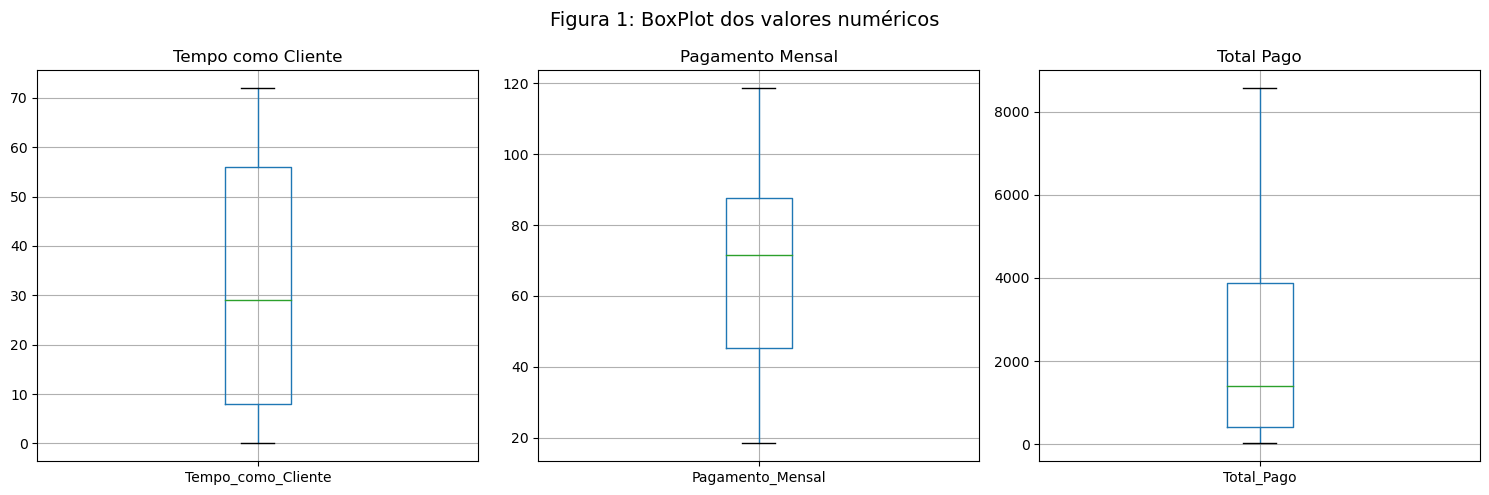

In [6]:
#Boxplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # 1 linha, 3 colunas, tamanho da figura
fig.suptitle('Figura 1: BoxPlot dos valores numéricos', fontsize=14)

# Plotando os boxplots em cada subplot
df.boxplot(column='Tempo_como_Cliente', ax=ax[0])
df.boxplot(column='Pagamento_Mensal', ax=ax[1])
df.boxplot(column='Total_Pago', ax=ax[2])

#Títulos
ax[0].set_title('Tempo como Cliente')
ax[1].set_title('Pagamento Mensal')
ax[2].set_title('Total Pago')

plt.tight_layout()
plt.show()

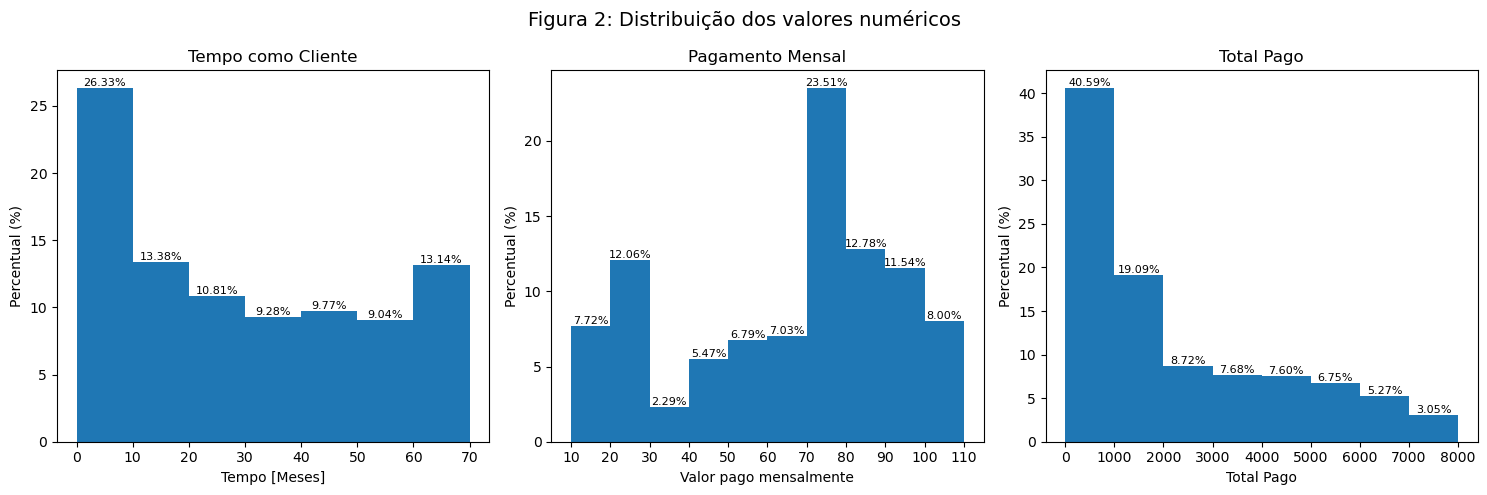

In [7]:
#histogramas
fig, ax = plt.subplots(1, 3, figsize=(15, 5)) 
fig.suptitle('Figura 2: Distribuição dos valores numéricos', fontsize=14)

N=len(df)
temp1=df['Tempo_como_Cliente']
bins1=np.arange(0,80,10)
c1, x1= np.histogram(temp1, bins1)
p1=c1/N*100

temp2=df['Pagamento_Mensal']
bins2=np.arange(10,120,10)
c2, x2= np.histogram(temp2, bins2)
p2=c2/N*100

temp3=df['Total_Pago']
bins3=np.arange(0,9000,1000)
c3, x3= np.histogram(temp3, bins3)
p3=c3/N*100


ax[0].bar(x1[0:-1], p1, width=np.diff(bins1), align='edge')  
ax[0].set_title('Tempo como Cliente')
ax[0].set_xlabel('Tempo [Meses]')
ax[0].set_ylabel('Percentual (%)')
ax[0].set_xticks(bins1)
for i in range(len(c1)):
        ax[0].text(x1[i]+5, p1[i] , f'{p1[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[1].bar(x2[0:-1], p2, width=np.diff(bins2), align='edge')  
ax[1].set_title('Pagamento Mensal')
ax[1].set_xlabel('Valor pago mensalmente')
ax[1].set_ylabel('Percentual (%)')
ax[1].set_xticks(bins2)
for i in range(len(c2)):
    ax[1].text(x2[i]+5, p2[i] , f'{p2[i]:.2f}%', ha='center', va='bottom', fontsize=8)


ax[2].bar(x3[0:-1], p3, width=np.diff(bins3), align='edge')  
ax[2].set_title('Total Pago')
ax[2].set_xlabel('Total Pago')
ax[2].set_ylabel('Percentual (%)')
ax[2].set_xticks(bins3)
for i in range(len(c3)):
    ax[2].text(x3[i]+500, p3[i] , f'{p3[i]:.2f}%', ha='center', va='bottom', fontsize=8)    
plt.tight_layout()

##### **Teste estatístico Kolmogorov-Smirnov**
Avaliar a normalidade das seguintes distribuições com significancia de 5%. O resultado é apresentado abaixo

| Teste KS                     | Assimetria  | Curtose  | Estatística KS | Valor p                 | Conclusão |
|------------------------------|------------|---------|---------------|-------------------------|------------|
| **Tempo como Cliente**       | 0.2448     | -1.3839 | 0.1135        | 2.18e-28                | Dados NÃO seguem distribuição normal |
| **Pagamento Mensal**         | -0.3747    | -0.9534 | 0.1452        | 3.11e-46                | Dados NÃO seguem distribuição normal |
| **Total Pago**               | 0.9364     | -0.3061 | 0.1612        | 5.85e-57                | Dados NÃO seguem distribuição normal |
| **Total Pago  2000**        | 0.2845     | -0.9216 | 0.0721        | 5.63e-05                | Dados NÃO seguem distribuição normal |
**Tabela 4** : Resultado do teste Kolmogorov-Smirnov 


In [8]:
#teste estatistico Kolmogorov-Smirnov
from scipy.stats import kstest

def teste_KS(dados):
    '''
    Hipotese nula Ho:     '''
    ks_statistic, p_valor = kstest(dados, 'norm', args=(np.mean(dados), np.std(dados)))
   # ks_statistic, p_valor = kstest(dados, 'expon') #, args=(np.mean(dados), np.std(dados)))
    assimetria = skew(dados)
    curtose = kurtosis(dados)

    print(f"assimetria : {assimetria }")
    print(f"curtose: {curtose}")
    print(f"Estatística KS: {ks_statistic}")
    print(f"Valor p: {p_valor}")

   
    alpha = 0.05  # Nível de significância de 5%
    if p_valor < alpha:
        print("Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.")
    else:
        print("Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.")
    print('-' * 70)
print('Teste KS: Tempo como Cliente')
teste_KS(df['Tempo_como_Cliente'])
print('Teste KS: Pagamento Mensal')
teste_KS(df['Pagamento_Mensal'])
print('Teste KS: Total Pago:')
teste_KS(df['Total_Pago'])        

Teste KS: Tempo como Cliente
assimetria : 0.24476478182333972
curtose: -1.3839261100325009
Estatística KS: 0.11352496385771532
Valor p: 2.181671797158078e-28
Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------
Teste KS: Pagamento Mensal
assimetria : -0.3746648993893217
curtose: -0.9533763497258412
Estatística KS: 0.1451894741978058
Valor p: 3.105378669667121e-46
Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------
Teste KS: Total Pago:
assimetria : 0.9364345796123691
curtose: -0.30611161378776064
Estatística KS: 0.16120978878838133
Valor p: 5.854572559398505e-57
Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------


Teste KS: Total Pago <2000:
assimetria : 0.2844770734498954
curtose: -0.9216468933841231
Estatística KS: 0.07206990719628392
Valor p: 5.634453400652933e-05
Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------


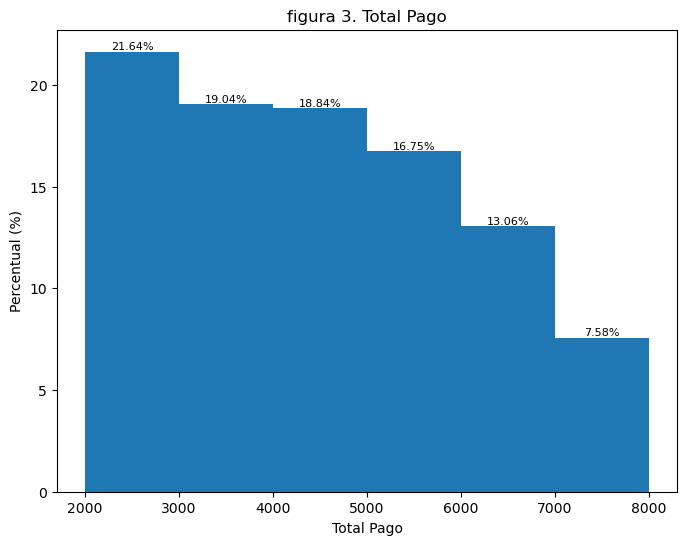

In [9]:
#filtragem total pago Maior que 2000
df2000=df[df['Total_Pago']>2000]
# #teste de normalidade dos dados
print('Teste KS: Total Pago <2000:')
teste_KS(df2000['Total_Pago'])  
#plotagem do histograma
fig = plt.subplots(figsize=(8, 6))
bins=np.arange(2000,9000,1000)
c, x= np.histogram(df2000['Total_Pago'], bins)
N=len(df2000)
p=c/N*100
plt.bar(x[0:-1], p, width=np.diff(bins), align='edge')  
plt.title('figura 3. Total Pago')
plt.xlabel('Total Pago')
plt.ylabel('Percentual (%)')
plt.xticks(bins)
for i in range(len(c)):
    plt.text(x[i]+500, p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=8)
plt.show()


#### 2) Colunas Booleanas
Para avaliar estes dados, a primeira pergunta a ser respondia é o percentual dos clientes com ou sem internet, sem qualificar o tipo de internet usada. Observamos que 78.8% dos clientes possuem serviço de internet e apenas 21.1% não possuem qualquer serviço de internet(figura 4). Desta forma classificamos nossa base a seguir em dois grupos com internet e sem internet.

##### **Com Internet**:
Para este grupo observamos que a maioria dos clientes não é idoso(80%), não possuem dependentes(71.7%) e não utilizam serviço de segurança(63.9%) ou suporte Técnico(63.7%). Além disso, solteiros(50.7%) e casados(49.3%) estão equilibrados. Observamos que aproximadamentes metade dos clientes(48.95%) contrata algum serviço de streaming. Em relação ao churn, apenas 31% dos clientes estão com churn. Assim, algumas variáveis, como idosos, dependentes, serviços de segurança e suporte técnico, podem provocar um enviesamento em um modelo preditivo. Soma-se a isso o fato de que a variável de interesse, churn, também se encontra desbalanceada. Os dados estão resumidos nas tabelas 4 abaixo e nos gráficos da figura 5. 

| Categoria            | Não      | Sim     |
|----------------------|------------|------------|
| Idoso               | 80.27       | 19.73      |
| Casado              | 50.69       | 49.31      |
| Dependents          | 71.75       | 28.25      |
| Churn               | 68.64       | 31.36      |
| Servico_Seguranca   | 63.95       | 36.05      |
| Suporte_Tecnico     | 63.74       | 36.26      |
| StreamingTV         | 51.05       | 48.95      |
**Tabela 5**: Clientes com  serviço de internet

##### **Sem Internet**
Primeiramente, a grande maioria desses clientes não são idosos, representando 97.15% do total, a proporção entre clientes casados e solteiros está novamente equilibrada, com 50.85% não casados e 49.15% casados. Em relação ao dependentes, há uma ligeiro aumento a não ter dependentes (56%). Em relação ao churn, apenas 6% do clientes estão com churn. Os dados estão resumidos nas tabelas 4 abaixo e nos gráficos( figura 6) a seguir

| Categoria            | Não      | Sim      |
|----------------------|------------|------------|
| Idoso               | 97.15       | 2.85       |
| Casado              | 50.85       | 49.15      |
| Dependents          | 56.55       | 43.45      |
| Churn               | 93.93       | 6.07       |
**Tabela 6**: Clientes sem serviço internet


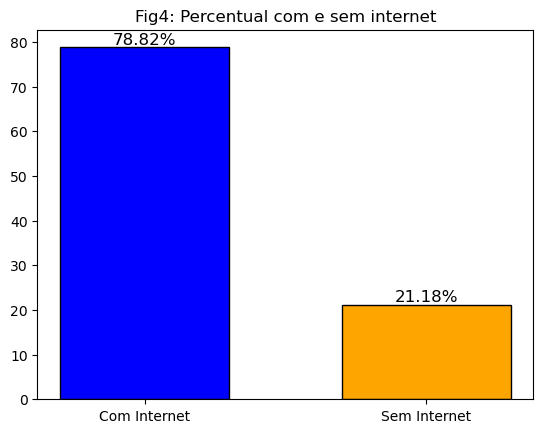

<Figure size 640x480 with 0 Axes>

In [10]:
percentual_internet = (df['Servico_Internet']=='0').value_counts(normalize=True) * 100
plt.bar(percentual_internet.index, percentual_internet.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
plt.title('Fig4: Percentual com e sem internet')

plt.xticks([0, 1],['Com Internet', 'Sem Internet'])
for i in range(2):
    plt.text(i, percentual_internet.values[i] , f'{percentual_internet.values[i]:.2f}%', ha='center', va='bottom', fontsize=12)
plt.show()
plt.tight_layout()


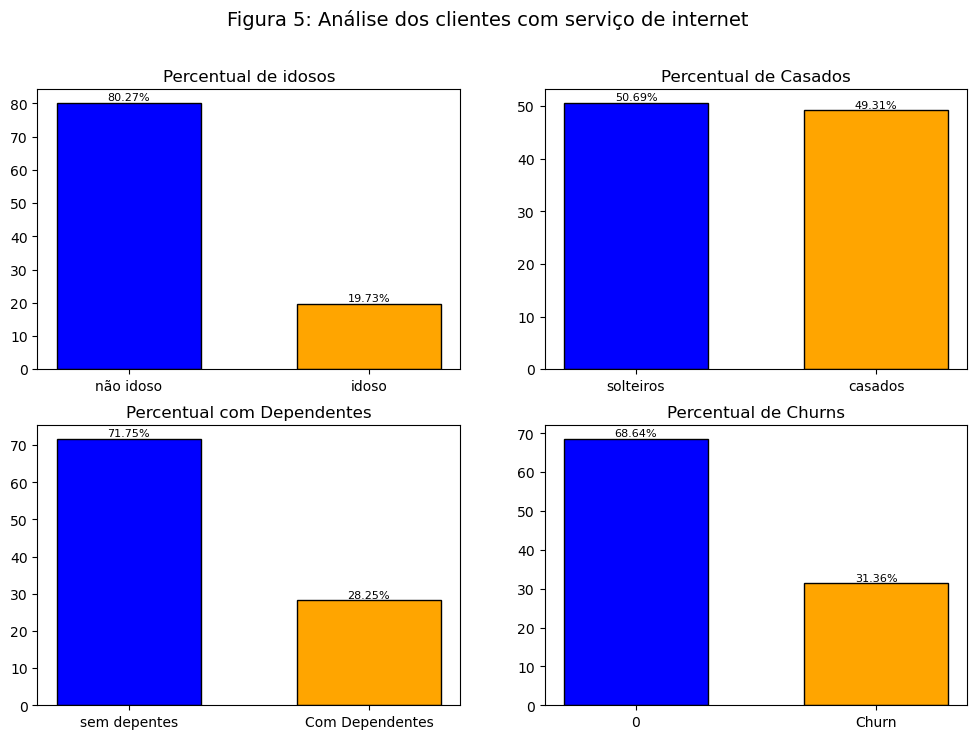

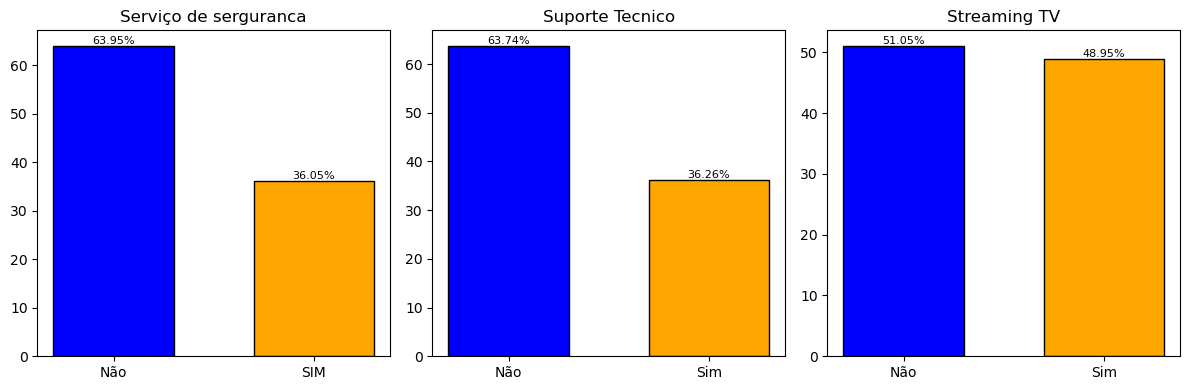

In [11]:
#Com Internet
dfi=df[df['Servico_Internet']!='0'] #Filtragem

fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # 2 linhas, 2 colunas
fig.suptitle('Figura 5: Análise dos clientes com serviço de internet', fontsize=14)

percentual1 = dfi['Idoso'].value_counts(normalize=True) * 100
percentual2 = dfi['Casado'].value_counts(normalize=True) * 100
percentual3 = dfi['Dependents'].value_counts(normalize=True) * 100
percentual4 = dfi['Servico_Seguranca'].value_counts(normalize=True) * 100
percentual5 = dfi['Suporte_Tecnico'].value_counts(normalize=True) * 100
percentual6 = dfi['StreamingTV'].value_counts(normalize=True) * 100
percentual7 = dfi['Churn'].value_counts(normalize=True) * 100

#grupo 2x2 ( idosos, casados, dependentes,churns)
# plot1: Idosos
ax[0,0].bar(percentual1.index, percentual1.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[0,0].set_title('Percentual de idosos')
ax[0,0].set_xticks([0, 1])
ax[0,0].set_xticklabels(['não idoso', 'idoso'])
for i in range(2):
    ax[0,0].text(i, percentual1.values[i] , f'{percentual1.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# plot2: Casados
ax[0,1].bar(percentual2.index, percentual2.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[0,1].set_title('Percentual de Casados')
ax[0,1].set_xticks([0, 1])
ax[0,1].set_xticklabels(['solteiros', 'casados'])
for i in range(2):
    ax[0,1].text(i, percentual2.values[i] , f'{percentual2.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)
    
# plot3: Dependetes
ax[1,0].bar(percentual3.index, percentual3.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[1,0].set_title('Percentual com Dependentes')
ax[1,0].set_xticks([0, 1])
ax[1,0].set_xticklabels(['sem depentes', 'Com Dependentes'])
for i in range(2):
    ax[1,0].text(i, percentual3.values[i] , f'{percentual3.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# plot4: Churns
ax[1,1].bar(percentual7.index, percentual7.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[1,1].set_title('Percentual de Churns')
ax[1,1].set_xticks([0, 1])
ax[1,1].set_xticklabels(['0', 'Churn'])
for i in range(2):
    ax[1,1].text(i, percentual7.values[i] , f'{percentual7.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)


##grupo 1x3 (Servico_Seguranca,	Suporte_Tecnico,	StreamingTV)

# plot1: Servico_Seguranca
fig2, ax = plt.subplots(1, 3, figsize=(12, 4))  # 1 linhas, 3 colunas
ax[0].bar(percentual4.index, percentual4.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[0].set_title('Serviço de serguranca')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Não', 'SIM'])
for i in range(2):
    ax[0].text(i, percentual4.values[i] , f'{percentual4.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)
    
# plot2: Suporte Técnico
ax[1].bar(percentual5.index, percentual5.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[1].set_title('Suporte Tecnico')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Não', 'Sim'])
for i in range(2):
    ax[1].text(i, percentual5.values[i] , f'{percentual5.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)
    
# plot3: Streaming TV
ax[2].bar(percentual6.index, percentual6.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[2].set_title('Streaming TV')
ax[2].set_xticks([0, 1])
ax[2].set_xticklabels(['Não', 'Sim'])
for i in range(2):
    ax[2].text(i, percentual6.values[i] , f'{percentual6.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

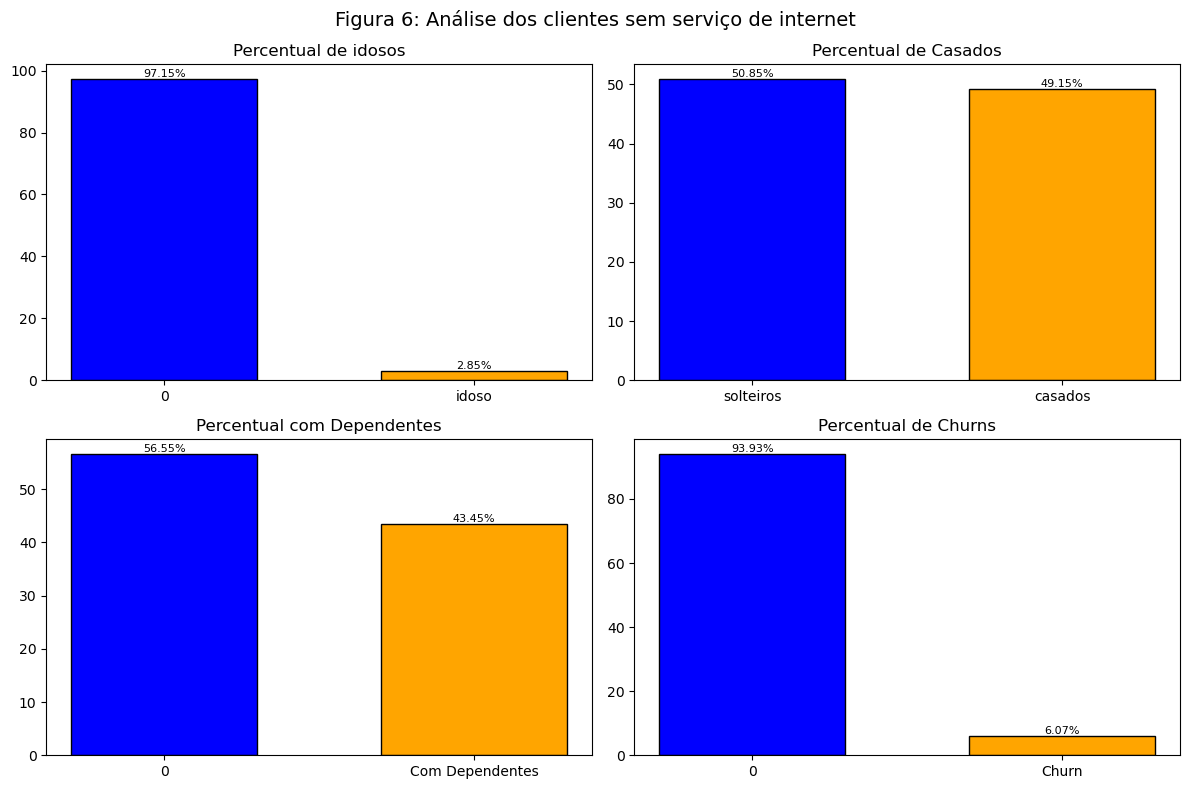

In [12]:
#Filtragem Sem Internet
dfs=df[df['Servico_Internet']=='0'] #dataset sem internet

percentual1s = dfs['Idoso'].value_counts(normalize=True) * 100
percentual2s = dfs['Casado'].value_counts(normalize=True) * 100
percentual3s = dfs['Dependents'].value_counts(normalize=True) * 100
percentual4s = dfs['Servico_Seguranca'].value_counts(normalize=True) * 100
percentual5s = dfs['Suporte_Tecnico'].value_counts(normalize=True) * 100
percentual6s = dfs['StreamingTV'].value_counts(normalize=True) * 100
percentual7s = dfs['Churn'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # 2 linhas, 2 colunas
fig.suptitle('Figura 6: Análise dos clientes sem serviço de internet', fontsize=14)

# plot1: Idosos
ax[0,0].bar(percentual1s.index, percentual1s.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[0,0].set_title('Percentual de idosos')
ax[0,0].set_xticks([0, 1])
ax[0,0].set_xticklabels(['0', 'idoso'])
for i in range(2):
    ax[0,0].text(i, percentual1s.values[i] , f'{percentual1s.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# plot2: Casados
ax[0,1].bar(percentual2s.index, percentual2s.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[0,1].set_title('Percentual de Casados')
ax[0,1].set_xticks([0, 1])
ax[0,1].set_xticklabels(['solteiros', 'casados'])
for i in range(2):
    ax[0,1].text(i, percentual2s.values[i] , f'{percentual2s.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# plot3: Dependents
ax[1,0].bar(percentual3s.index, percentual3s.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[1,0].set_title('Percentual com Dependentes')
ax[1,0].set_xticks([0, 1])
ax[1,0].set_xticklabels(['0', 'Com Dependentes'])
for i in range(2):
    ax[1,0].text(i, percentual3s.values[i] , f'{percentual3s.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# plot4: Churns
ax[1,1].bar(percentual7s.index, percentual7s.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[1,1].set_title('Percentual de Churns')
ax[1,1].set_xticks([0, 1])
ax[1,1].set_xticklabels(['0', 'Churn'])
for i in range(2):
    ax[1,1].text(i, percentual7s.values[i] , f'{percentual7s.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()


#### 3) Colunas Categoricas(strings)

A distribuição de gênero entre os clientes está equilibrada, com 51% sendo homens e 49% mulheres. Em relação ao serviço de internet, a maioria dos clientes utiliza fibra óptica (44.98%), seguida pelo DSL (33.84%), enquanto 21,18% não possuem serviço de internet. Quanto ao tipo de contrato, 55.02% optam pelo plano mensal, enquanto 24.2% escolhem um contrato de dois anos e 20.78% um contrato de um ano.
No que diz respeito aos métodos de pagamento, o cheque eletrônico é o mais utilizado (33.36%), seguido por transferência bancária automática (23.27%) e cartão de crédito automático (22.15%) e  cheque físico (21.22% ). A priori, essas informações dão indicativos da preferência pelo plano curtos, internet de fibra Opitica e contratos curtos( mensais). Em relação aos método de pagamento, estão bem distribuidos como uma ligeira tendencia a preferencia por cheque eletrônico. Esses resultados estão organizados na tabela 5 e nos gráficos da figura 7


| Categoria          | Opção                        | Proporção (%) |
|--------------------|-----------------------------|--------------|
| **Gênero**        | Masculino                    | 51.00        |
|                   | Feminino                     | 48.99        |
| **Serviço Internet** | Fibra Óptica                | 44.98        |
|                   | DSL                          | 33.84        |
|                   | Sem Internet                 | 21.18        |
| **Tipo de Contrato** | Mensal                     | 55.02        |
|                   | Dois anos                    | 24.20        |
|                   | Um ano                       | 20.78        |
| **Método de Pagamento** | Cheque Eletrônico        | 33.36        |
|                   | Transferência Bancária       | 23.27        |
|                   | Cartão de Crédito            | 22.15        |
|                   | Cheque Físico                | 21.22        |
**Tabela 7**.Resumo estatistico

Observação. A primeira coluna **customerID** é a própria identificação do cliente.

#### Comentário sobre análise Univariada
A análise revela padrões importantes sobre os clientes e sua propensão ao churn. As variáveis numéricas não seguem uma distribuição normal, especialmente a coluna **Total_Pago**, que apresenta forte concentração abaixo de 2000. Esse fator pode influenciar modelos preditivos.
Entre os clientes, a maioria possui serviço de internet (78,8%), sendo que esse grupo apresenta maior taxa de churn (31%) em comparação aos clientes sem internet (6%). Além disso, idosos, clientes sem dependentes e aqueles que não utilizam serviços adicionais tendem a cancelar mais.
Nos contratos, a preferência por planos mensais (55,02%) sugere menor compromisso a longo prazo, o que pode estar relacionado à maior taxa de churn. O método de pagamento mais utilizado é o cheque eletrônico (33,36%), indicando uma leve tendência de preferência por esse meio.



/tmp/ipykernel_507558/387341356.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(percentuald.index, rotation=45, ha="right")


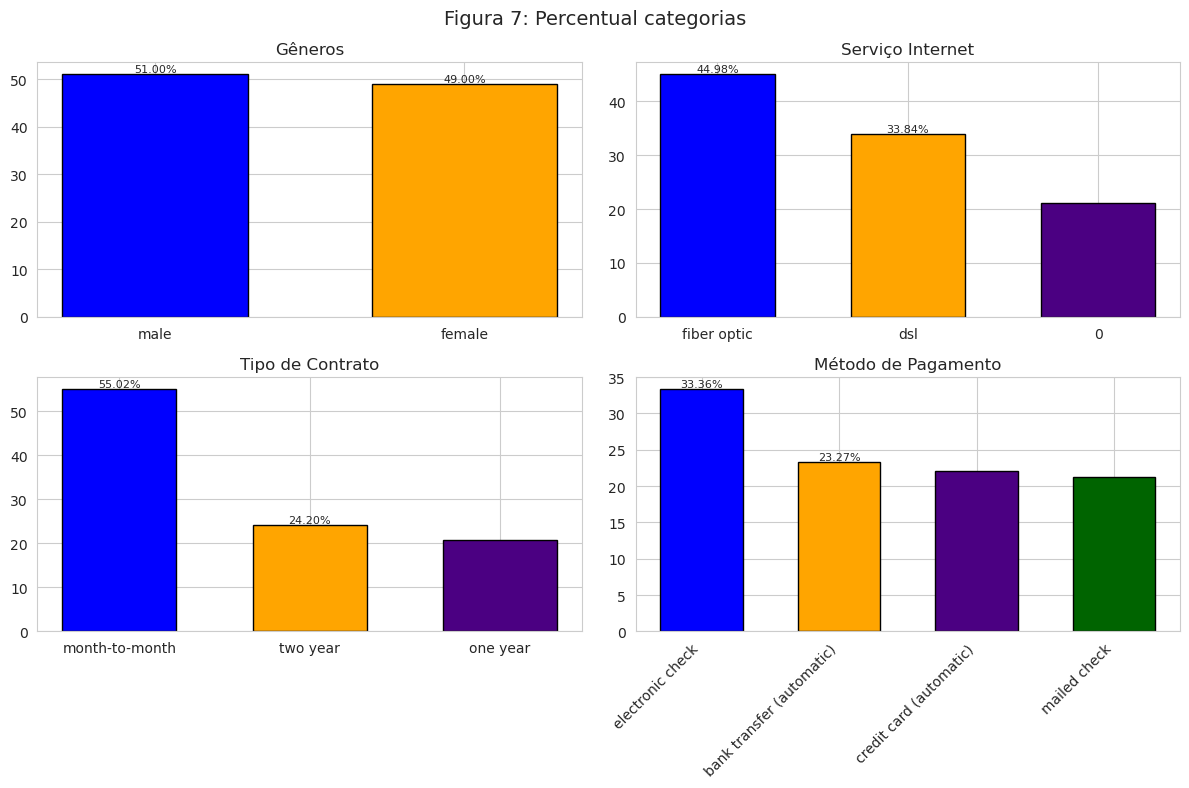

In [36]:
df['PaymentMethod'].value_counts()
percentuala = df['Genero'].value_counts(normalize=True) * 100
percentualb = df['Servico_Internet'].value_counts(normalize=True) * 100
percentualc = df['Tipo_Contrato'].value_counts(normalize=True) * 100
percentuald = df['PaymentMethod'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # 2 linhas, 2 colunas
fig.suptitle('Figura 7: Percentual categorias', fontsize=14)

# plot1: Gênero
ax[0,0].bar(percentuala.index, percentuala.values, color=['blue', 'orange','indigo'], edgecolor='black', width=0.6)
ax[0,0].set_title('Gêneros')
for i in range(2):
    ax[0,0].text(i, percentuala.values[i] , f'{percentuala.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# plot2: Servico_Internet
ax[0,1].bar(percentualb.index, percentualb.values, color=['blue', 'orange','indigo'], edgecolor='black', width=0.6)
ax[0,1].set_title('Serviço Internet')
for i in range(2):
    ax[0,1].text(i, percentualb.values[i] , f'{percentualb.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)
    
# plot3: Tipo_Contrato
ax[1,0].bar(percentualc.index, percentualc.values, color=['blue', 'orange','indigo'], edgecolor='black', width=0.6)
ax[1,0].set_title('Tipo de Contrato')
for i in range(2):
    ax[1,0].text(i, percentualc.values[i] , f'{percentualc.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# plot4: Métodos de pagamento
ax[1,1].bar(percentuald.index, percentuald.values, color=['blue', 'orange','indigo','darkgreen'], edgecolor='black', width=0.6)
ax[1,1].set_title('Método de Pagamento')
ax[1,1].set_xticklabels(percentuald.index, rotation=45, ha="right") 
for i in range(2):
    ax[1,1].text(i, percentuald.values[i] , f'{percentuald.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
    

### **3-Identifique e trate as colunas que contém outliers**
Não foi encontrado, ou classificado, nenhum dado como outlier. Alguns comentários sobre cada grupo abaixo. O resumo estatisco desses dados já foram apresentados na tabela 2 


- **Tempo como cliente:**\
A variável "Meses como Cliente" apresenta uma grande variação entre os clientes. A média é de 32.35 meses, enquanto o desvio padrão de 24.64 meses, indicando que esse tempo dos clientes está disperso na distribuição. A distribuição é assimétrica, com 25% dos clientes tendo menos de 8 meses, a mediana sendo ~29 meses, e 75% dos clientes tendo até 56 meses. O maximo de clientes registrado é 72 meses. Observamos ainda um numero consideravel nos primeiros meses, inclusive uma moda em 1 mês( 214 registros). Algums possibilidades para esse moda em 1 mês são clintes que assinam e cancelam rapidamente.  

- **Total pago:**\
A variável "Total Pago" apresenta uma grande variação nos valores pagos pelos clientes. A média é de 2290.09, mas o desvio padrão de 2264.59 indicanso uma alta dispersão dos dados, sugerindo que há clientes com gastos muito distintos. O menor valor pago é 18,80, enquanto o máximo chega a 8564.75, mostrando que alguns clientes pagaram valores significativamente mais altos. O primeiro quartil (25%) é 402.34, ou seja, 25% dos clientes pagaram até esse valor. A mediana (50%) é 1402.90, o que significa que metade dos clientes pagou menos que isso e a outra metade pagou mais. O terceiro quartil (75%) é 3867.16, indicando que a maioria dos clientes pagou bem abaixo do valor máximo.
A moda é 20.2, ou seja, esse é o valor mais comum de pagamento entre os clientes, porém ocorreu apenas 5 vezes.A Alta variabilidade pode ser compreendida por conta deste resultado ser a soma individual dos pagamentos tanto de clientes novo como antigo, desta forma é compreensivel encontre valores altos para pgamento total de clientes mais antigos, assim como pagamentos mais baixo para novos clientes. Um sugestão é agrupar total_pago com tempo de cada clientes para melhor buscar entende melhor o perfil de clientes aqui. 

- **Pagamento Mensal:**\
 A média para pagamentos mensais é 66.34 e o desvio padrão de 28.05. Observamos que o menor pagamento é 
 é 18.40 ( muito próximo encontrado ao pagamento total), enquanto o máximo chega a 118.65. Essa variação de preços podem indicar diferentes tipos de plano e serviço. O primeiro quartil (25%) é 45.40, indicando que 25% dos clientes pagam até esse valor. A mediana (50%) é 71.45, ou seja, metade dos clientes paga até esse valor e a outra metade paga mais. O terceiro quartil (75%) é 87.71, mostrando que a maioria paga abaixo do valor máximo.
A moda é 71.45, ocorrendo 314 vezes, o que significa que esse é o valor mais comum de pagamento mensal entre os clientes. Como a mediana e a moda são iguais, a distribuição parece estar concentrada em torno desse valor, sugerindo que muitos clientes compartilham um plano ou pacote de serviços semelhante. 


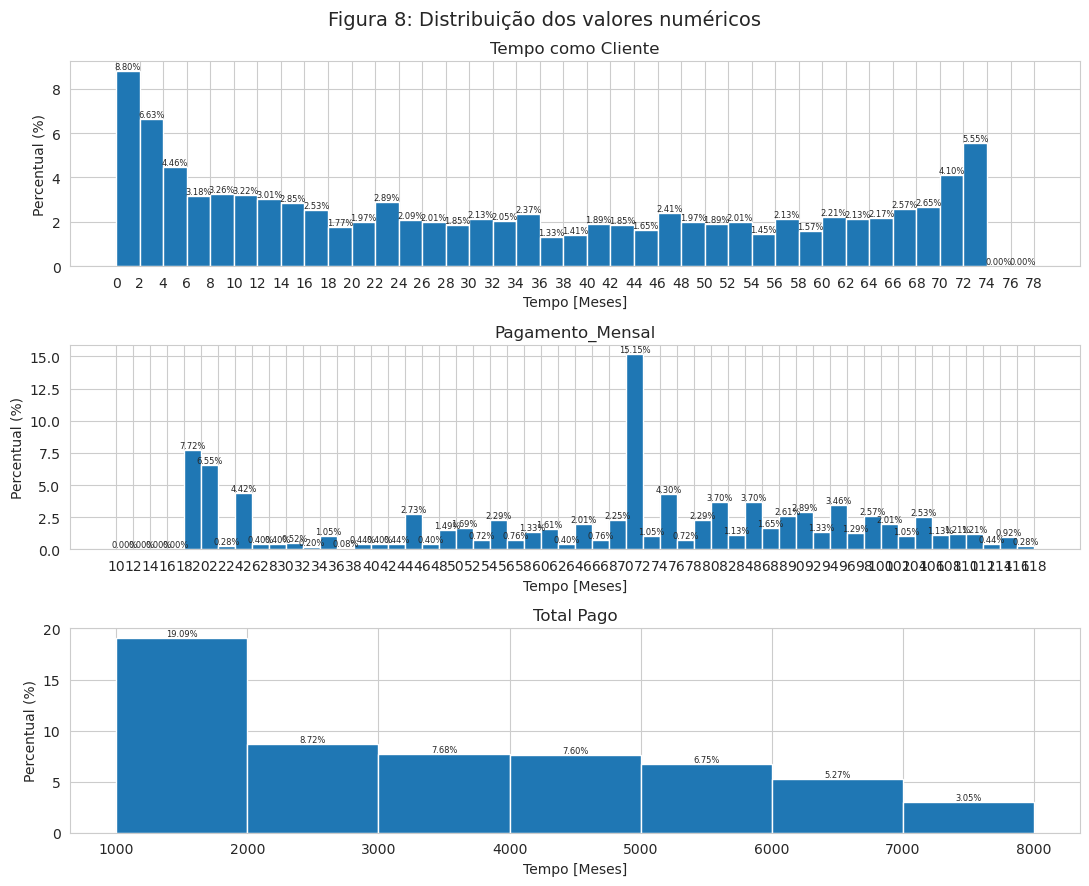

In [44]:
# moda = df['Tempo_como_Cliente'].mode()[0]  # Encontrar a moda
# frequencia = (df['Tempo_como_Cliente'] == moda).sum()  # Contar quantas vezes a moda aparece
# print('meses como cliente')
# print(f'moda : {moda}, Frequência: {frequencia}')
# print(df['Tempo_como_Cliente'].describe())
# moda = df['Total_Pago'].mode()[0]  # Encontrar a moda
# frequencia = (df['Total_Pago'] == moda).sum()  # Contar quantas vezes a moda aparece
# print('Total Pago')
# print(f'Moda : {moda}, Frequência: {frequencia}')
# print(df['Total_Pago'].describe())

# moda = df['Pagamento_Mensal'].mode()[0]  # Encontrar a moda
# frequencia = (df['Pagamento_Mensal'] == moda).sum()  # Contar quantas vezes a moda aparece
# print('Pagamento Mensal')
# print(f'Moda: {moda}, Frequência: {frequencia}')
# print(df['Pagamento_Mensal'].describe())


fig, ax = plt.subplots(3, 1, figsize=(11, 9)) 
fig.suptitle('Figura 8: Distribuição dos valores numéricos', fontsize=14)

temp=df['Tempo_como_Cliente']
db=2
bins=np.arange(0,80,db)

c, x= np.histogram(temp, bins)
N=len(df)
p=c/N*100
ax[0].bar(x[0:-1], p, width=np.diff(bins), align='edge')  
ax[0].set_title('Tempo como Cliente')
ax[0].set_xlabel('Tempo [Meses]')
ax[0].set_ylabel('Percentual (%)')
ax[0].set_xticks(bins)
for i in range(len(c)):
    ax[0].text(x[i]+db/2, p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=6)


temp=df['Pagamento_Mensal']
db=2
bins=np.arange(10,120,db)
c, x= np.histogram(temp, bins)
N=len(df)
p=c/N*100
ax[1].bar(x[0:-1], p, width=np.diff(bins), align='edge')  
ax[1].set_title('Pagamento_Mensal')
ax[1].set_xlabel('Tempo [Meses]')
ax[1].set_ylabel('Percentual (%)')
ax[1].set_xticks(bins)
for i in range(len(c)):
    ax[1].text(x[i]+db/2, p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=6)

temp=df['Total_Pago']
db=1000
bins=np.arange(1000,9000,db)
c, x= np.histogram(temp, bins)
N=len(df)
p=c/N*100
ax[2].bar(x[0:-1], p, width=np.diff(bins), align='edge')  
ax[2].set_title('Total Pago')
ax[2].set_xlabel('Tempo [Meses]')
ax[2].set_ylabel('Percentual (%)')
ax[2].set_xticks(bins)
for i in range(len(c)):
    ax[2].text(x[i]+db/2, p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=6)
plt.tight_layout()
plt.show()
    

### **4-Realize a etapa da análise bivariada:**
>**Importante:**\
>a) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.\
>b) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?\

A seguir  apresentamos a analise bivariada para os grupos descritos visando compreender o comportamento dessas a fim de incluir  estas estatísticas nas tomadas de decisões.
#### Parte 1: (Genero, idosos, Casados,Dependentes) x Churn
##### Genero X Churn

A distribuição de gênero em relação ao churn mostra algumas diferenças sutis. Entre os clientes que não cancelaram o serviço, 51,82% são homens e 48,18% são mulheres, sugerindo uma leve predominância masculina na retenção. Por outro lado, entre os clientes que cancelaram o serviço, a diferença se inverte ligeiramente: 51,31% são mulheres e 48,69% são homens. Isso pode indicar que as mulheres, ainda que em pequena margem, têm uma maior tendência ao cancelamento em comparação aos homens.

##### Idosos X Churn
A relação entre idosos e churn revela padrões interessantes. Entre os clientes não idosos, a maioria (86,64%) manteve o serviço, enquanto 75,89% dos que cancelaram também pertenciam a esse grupo. Isso indica que, mesmo com o cancelamento, os não idosos ainda representam a maior parte da base de clientes. Já entre os idosos, apenas 13,36% permaneceram com o serviço, mas 24,11% optaram pelo cancelamento. Esse aumento percentual sugere que os idosos possuem uma maior propensão a cancelar o serviço em comparação aos não idosos.

##### Casados X Churn
A relação entre estado civil e churn mostra diferenças notáveis no comportamento dos clientes. Entre os não casados, 46,39% continuaram com o serviço, enquanto 63,06% daqueles que cancelaram pertenciam a esse grupo. Isso sugere que clientes não casados têm maior propensão a cancelar o serviço. Por outro lado, entre os casados, a maioria (53,61%) permaneceu como cliente, e apenas 36,94% dos cancelamentos vieram desse grupo. Esse padrão indica que clientes casados tendem a ser mais fiéis ao serviço do que os não casados.

##### Dependentes X Churn
A maioria dos clientes sem dependentes mantém o serviço, representando 63,77% dos casos de não cancelamento. No entanto, quando olhamos para os clientes que cancelaram o serviço, 82,07% deles não tinham dependentes, enquanto apenas 17,93% dos cancelamentos ocorreram entre aqueles com dependentes. Isso sugere que clientes com dependentes tendem a ser mais fiéis ao serviço, possivelmente por uma maior necessidade de estabilidade ou por enxergarem mais valor na continuidade do contrato.

##### Conclusões
A análise do churn com base em gênero, idade, estado civil e presença de dependentes revela padrões distintos de comportamento dos clientes. Embora a diferença entre homens e mulheres seja sutil, há uma leve tendência de maior cancelamento entre as mulheres. A idade se mostra um fator relevante, com idosos apresentando uma maior propensão ao churn em comparação aos não idosos.

O estado civil também influencia a retenção: clientes não casados cancelam mais o serviço, enquanto os casados demonstram maior fidelidade. Da mesma forma, a presença de dependentes parece estar associada a uma maior retenção, sugerindo que esses clientes enxergam mais valor na continuidade do serviço.

Esses padrões indicam que fatores como estabilidade familiar e necessidade percebida do serviço podem impactar a decisão de manter ou cancelar a assinatura. Estratégias voltadas para oferecer benefícios personalizados a grupos mais propensos ao churn podem ajudar a melhorar a retenção e reduzir a taxa de cancelamento.

**Highlights:**

- Gênero: Leve tendência de maior cancelamento entre as mulheres.
- Idade: Idosos apresentam maior propensão ao churn em comparação aos não idosos.
- Estado civil: Clientes não casados cancelam mais, enquanto casados demonstram maior fidelidade.
- Dependentes: Clientes com dependentes tendem a permanecer mais tempo no serviço.
- Fatores-chave: Estabilidade familiar e necessidade percebida influenciam a retenção.
- Estratégia: Estabilidade familiar influenciam a retenção, oferecer benefícios personalizados pode reduzir o churn e aumentar a fidelização.

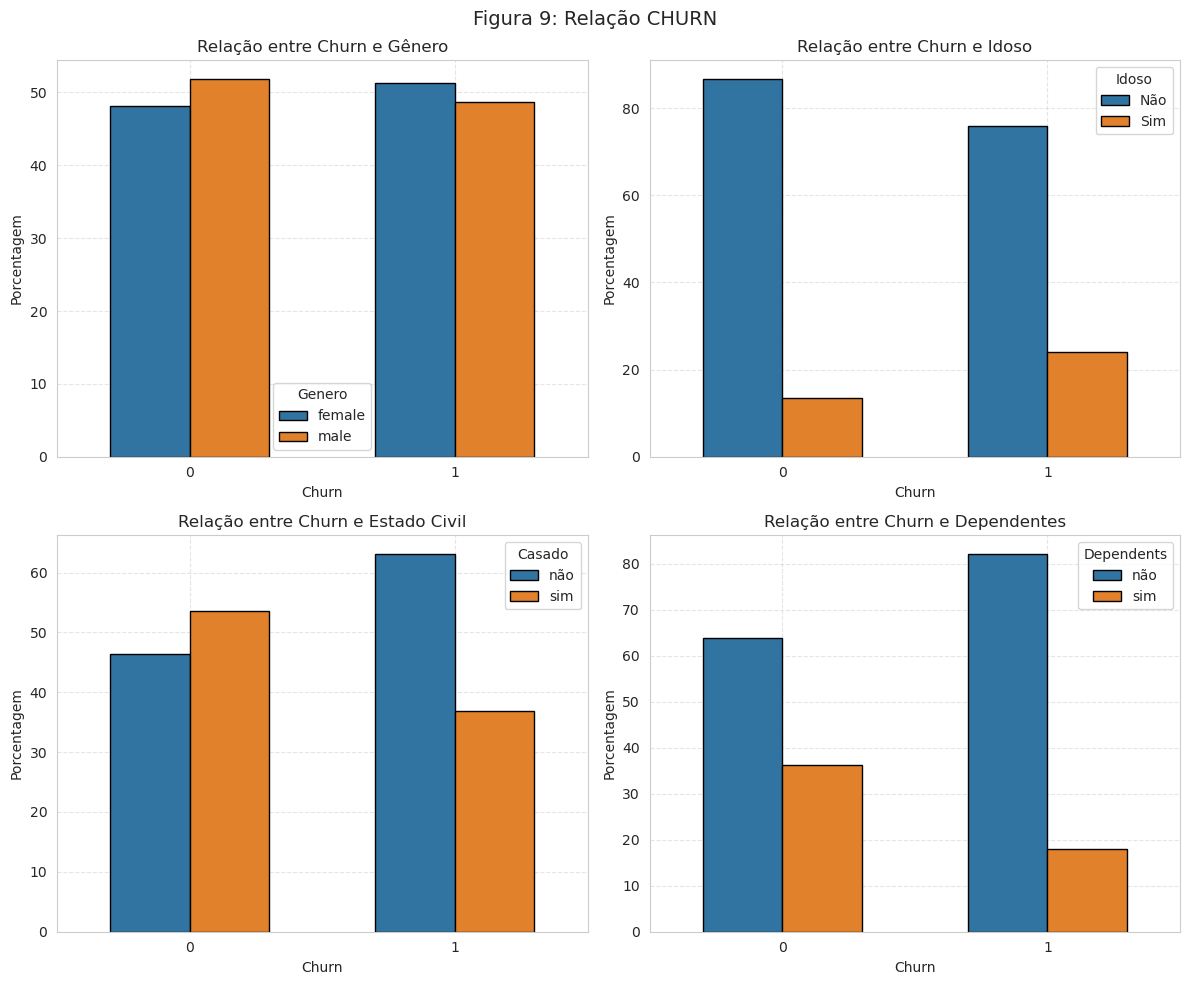

In [55]:
#GeneroXchurn
# Relação entre Churn e Gênero
df_grouped1 = df.groupby(['Genero','Churn']).size().reset_index(name='count')
total_por_churn1 = df_grouped1.groupby('Churn')['count'].transform('sum')
df_grouped1['percent'] = (df_grouped1['count'] / total_por_churn1) * 100

df_grouped2 = df.groupby(['Idoso', 'Churn']).size().reset_index(name='count')
total_por_churn2 = df_grouped2.groupby('Churn')['count'].transform('sum')
df_grouped2['percent'] = (df_grouped2['count'] / total_por_churn2) * 100
df_grouped2['Idoso'] = df_grouped2['Idoso'].replace({0: 'Não', 1: 'Sim'}) 

df_grouped3 = df.groupby(['Casado', 'Churn']).size().reset_index(name='count')
total_por_churn3 = df_grouped3.groupby('Churn')['count'].transform('sum')
df_grouped3['percent'] = (df_grouped3['count'] / total_por_churn2) * 100
df_grouped3['Casado'] = df_grouped3['Casado'].replace({0: 'não', 1: 'sim'}) 

df_grouped4 = df.groupby(['Dependents', 'Churn']).size().reset_index(name='count')
total_por_churn4 = df_grouped4.groupby('Churn')['count'].transform('sum')
df_grouped4['percent'] = (df_grouped4['count'] / total_por_churn2) * 100
df_grouped4['Dependents'] = df_grouped4['Dependents'].replace({0: 'não', 1: 'sim'})


# Criar a figura e eixos
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Figura 9: Relação CHURN', fontsize=14)
sns.set_style("whitegrid") 


# plot1: Churn x Gênero
sns.barplot(data=df_grouped1, x='Churn', y='percent', hue='Genero',
            edgecolor='black', width=0.6,ax=ax[0, 0])
ax[0, 0].set_title('Relação entre Churn e Gênero')
ax[0, 0].set_xlabel('Churn')
ax[0, 0].set_ylabel('Porcentagem')
ax[0, 0].grid(True, linestyle='--', alpha=0.5)

# plot2: Churn x Idoso
sns.barplot(data=df_grouped2, x='Churn', y='percent', hue='Idoso', 
            edgecolor='black', width=0.6,ax=ax[0, 1])
ax[0, 1].set_title('Relação entre Churn e Idoso')
ax[0, 1].set_xlabel('Churn')
ax[0, 1].set_ylabel('Porcentagem')
ax[0, 1].grid(True, linestyle='--', alpha=0.5)

# plot3: Churn x Casado
sns.barplot(data=df_grouped3, x='Churn', y='percent', hue='Casado',
            edgecolor='black', width=0.6,ax=ax[1, 0])
ax[1, 0].set_title('Relação entre Churn e Estado Civil')
ax[1, 0].set_xlabel('Churn')
ax[1, 0].set_ylabel('Porcentagem')
ax[1, 0].grid(True, linestyle='--', alpha=0.5)

# plot4: Churn x Dependentes
sns.barplot(data=df_grouped4, x='Churn', y='percent', hue='Dependents',
            edgecolor='black', width=0.6,ax=ax[1, 1])
ax[1, 1].set_title('Relação entre Churn e Dependentes')
ax[1, 1].set_xlabel('Churn')
ax[1, 1].set_ylabel('Porcentagem')
ax[1, 1].grid(True, linestyle='--', alpha=0.5)
# Ajuste layout
plt.tight_layout()
plt.show()

#### Parte 2: Tipo de Contrato x Método de Pagamento x Churn

##### Tipo de ContratoX Método de Pagamento 
Clientes com contrato mensal preferem majoritariamente o pagamento via electronic check (48,14%), seguido pelo mailed check (21,04%), enquanto pagamentos automáticos por bank transfer (16,87%) e credit card (13,95%) são menos comuns, indicando uma busca por flexibilidade. Já nos contratos de um ano, os pagamentos automáticos ganham mais adesão (credit card 28,24% e bank transfer 25,73%), enquanto os métodos manuais caem para cerca de 23% cada. Nos contratos de dois anos, os pagamentos automáticos dominam (bank transfer 35,71% e credit card 35,55%), enquanto electronic check reduz drasticamente para 8,64%, mostrando que clientes de longo prazo priorizam a conveniência.

##### Tipo de Contrao X Churn
Nos contratos mensais, a taxa de cancelamento (churn) é alta, com 42,37% dos clientes saindo, indicando menor compromisso e maior sensibilidade a mudanças no serviço. Nos contratos de um ano, o churn cai para 11,22%, mostrando maior retenção, possivelmente devido a benefícios contratuais ou menor propensão a mudanças frequentes. Já nos contratos de dois anos, a fidelização é quase total, com apenas 1,50% de churn, evidenciando que clientes de longo prazo são muito mais estáveis e menos propensos a cancelar.

##### Método de Pagamento X Churn
Clientes que utilizam pagamentos automáticos via bank transfer ou credit card apresentam menor churn, com taxas de cancelamento de 17,96% e 13,61%, respectivamente, indicando maior estabilidade e fidelização. Já os que pagam por electronic check têm a maior taxa de churn (45,54%), sugerindo que esse método está associado a clientes mais voláteis. O mailed check tem um comportamento intermediário, com 17,05% de churn, semelhante ao bank transfer, mas ainda mais estável que o electronic check, reforçando a ideia de que pagamentos automáticos estão ligados a maior retenção.

##### conclusões
A análise revela que tanto o tipo de contrato quanto o método de pagamento influenciam diretamente a retenção de clientes. Contratos mensais estão associados a maior flexibilidade, com predominância do electronic check, mas também apresentam a maior taxa de cancelamento (42,37%), indicando menor compromisso. À medida que o tempo de contrato aumenta, cresce a adesão a pagamentos automáticos, como bank transfer e credit card, e a taxa de churn diminui drasticamente, chegando a 1,50% nos contratos de dois anos.

O método de pagamento também tem forte impacto na fidelização: clientes que utilizam electronic check apresentam a maior taxa de churn (45,54%), enquanto aqueles que optam por pagamentos automáticos demonstram maior estabilidade. Isso sugere que clientes que assumem compromissos de longo prazo e utilizam pagamentos recorrentes tendem a permanecer mais tempo com a empresa. Dessa forma, estratégias para incentivar contratos mais longos e pagamentos automáticos podem ser eficazes para reduzir o churn e aumentar a retenção de clientes.

**Highlights**:

- Tipo de contrato: Contratos mensais oferecem mais flexibilidade, mas apresentam a maior taxa de cancelamento (42,37%).
- Contratos longos: Pagamentos automáticos aumentam à medida que o contrato se estende, reduzindo o churn para 1,50% nos contratos de dois anos.
- Método de pagamento: Electronic check tem a maior taxa de churn (45,54%), enquanto pagamentos automáticos garantem maior estabilidade.
- Fidelização: Clientes com compromissos de longo prazo e pagamentos recorrentes permanecem mais tempo com a empresa.
- Estratégia: Clientes com compromissos de longo prazo e pagamentos recorrentes permanecem mais tempo com a empresa,incentivar contratos mais longos e pagamentos automáticos pode reduzir o churn e aumentar a retenção.

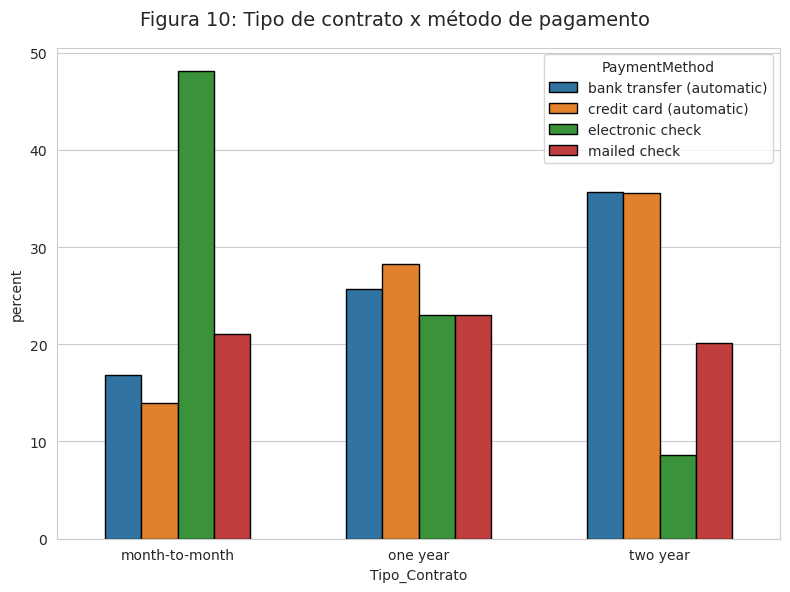

In [50]:
#tipo de Contrato e método de Pagamento

df_CP= df.groupby(['Tipo_Contrato', 'PaymentMethod']).size().reset_index(name='count')
total_CP=df_CP.groupby('Tipo_Contrato')['count'].transform('sum')
df_CP['percent'] = (df_CP['count'] / total_CP) * 100
fig,ax = plt.subplots(figsize=(8, 6))

fig.suptitle('Figura 10: Tipo de contrato x método de pagamento', fontsize=14)

sns.barplot(data=df_CP, x='Tipo_Contrato', y='percent', hue='PaymentMethod',edgecolor='black', width=0.6)
plt.tight_layout()

plt.show()


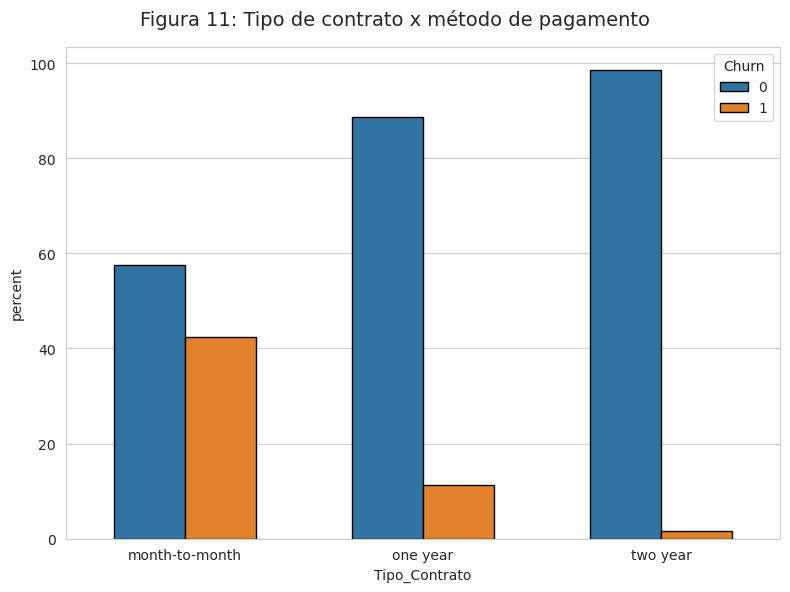

    Tipo_Contrato  Churn  count    percent
0  month-to-month      0    789  57.633309
1  month-to-month      1    580  42.366691
2        one year      0    459  88.781431
3        one year      1     58  11.218569
4        two year      0    593  98.504983
5        two year      1      9   1.495017


In [47]:
#tipo de Contrato e churn
df_CC= df.groupby(['Tipo_Contrato', 'Churn']).size().reset_index(name='count')
total_CC=df_CC.groupby('Tipo_Contrato')['count'].transform('sum')
df_CC['percent'] = (df_CC['count'] / total_CC) * 100

fig, ax = plt.subplots(figsize=(8, 6))  # Corrigido para armazenar fig e ax

fig.suptitle('Figura 11: Tipo de contrato x Churn', fontsize=14)

sns.barplot(data=df_CC, x='Tipo_Contrato', y='percent', hue='Churn',edgecolor='black', width=0.6)
plt.tight_layout()

plt.show()

print(df_CC)

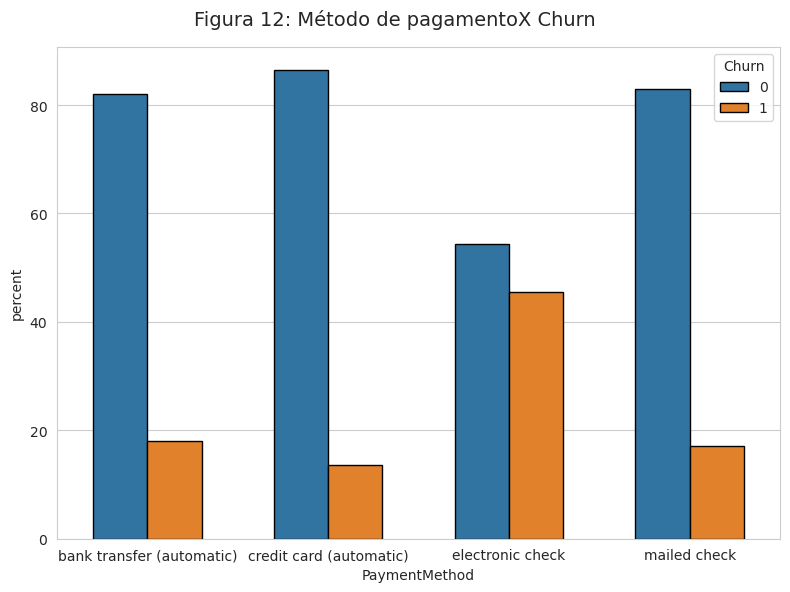

               PaymentMethod  Churn  count    percent
0  bank transfer (automatic)      0    475  82.037997
1  bank transfer (automatic)      1    104  17.962003
2    credit card (automatic)      0    476  86.388385
3    credit card (automatic)      1     75  13.611615
4           electronic check      0    452  54.457831
5           electronic check      1    378  45.542169
6               mailed check      0    438  82.954545
7               mailed check      1     90  17.045455


In [52]:
#Método de Pagamento e churn
df_PC= df.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='count')
total_PC=df_PC.groupby('PaymentMethod')['count'].transform('sum')
df_PC['percent'] = (df_PC['count'] / total_PC) * 100
fig,ax = plt.subplots(figsize=(8, 6))

fig.suptitle('Figura 12: Método de pagamentoX Churn', fontsize=14)

sns.barplot(data=df_PC, x='PaymentMethod', y='percent', hue='Churn',edgecolor='black', width=0.6)
plt.tight_layout()

plt.show()

print(df_PC)